In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from collections import Counter
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
import re
#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import openpyxl
import os

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LogisticRegression Mean Accuracy: 0.892 (0.036)
LinearDiscriminantAnalysis Mean Accuracy: 0.893 (0.033)


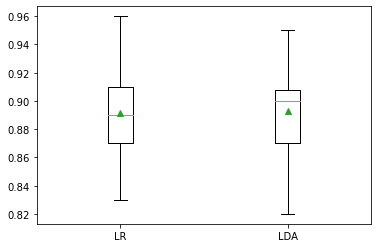

In [8]:
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))
# evaluate model 2
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('LinearDiscriminantAnalysis Mean Accuracy: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))
# plot the results
plt.boxplot([scores1, scores2], labels=['LR', 'LDA'], showmeans=True);


In [11]:

from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

P-value: 0.328, t-Statistic: 1.085
Algorithms probably have the same performance


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


X, y = iris_data()
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25,
                     random_state=123)

score1 = clf1.fit(X_train, y_train).score(X_test, y_test)
score2 = clf2.fit(X_train, y_train).score(X_test, y_test)

print('Logistic regression accuracy: %.2f%%' % (score1*100))
print('Decision tree accuracy: %.2f%%' % (score2*100))

Logistic regression accuracy: 97.37%
Decision tree accuracy: 94.74%


In [13]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X, y=y,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

/home/grace/anaconda3/envs/aim/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/grace/anaconda3/envs/aim/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

t statistic: 0.000
p value: 1.000
